In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_ab = pd.read_pickle('./output/1_df_raf_final-win-0924.pkl.zstd', compression='zstd')

df_b = pd.read_pickle('output/1_df_b_rafs_new-win-0924.pkl.zstd', compression='zstd')
df_b_shaders = pd.read_pickle('./output/1_df_b_shaders-win-0924.pkl.zstd', compression='zstd')
df_b_offscreen = pd.read_pickle('./output/1_df_raf_offscreen-win-0924.pkl.zstd', compression='zstd')
df_b_extensions = pd.read_pickle('./output/1_df_raf_extensions-win-0924.pkl.zstd', compression='zstd')


In [3]:
df_b_programs = pd.read_pickle('./output/1_df_programs-win-0924.pkl.zstd', compression='zstd')

In [4]:
df_perf = pd.read_pickle('../performance/output/df_performance-mac-15s-0924.pkl.zstd', compression='zstd')
df_perf = df_perf[df_perf.status == 'Ok'].drop(columns='status')
ok_index = df_perf.index

In [5]:
df_perf[df_perf['frames_count'].str.len() > 1]

,cpu_real,cpu_full,gpu_real,gpu_full,webgl_time,dropped_frame_duration,frames_count
1145,0.958737,1.425565,0.192862,0.311119,0.001377,0.183337,"[588, 599]"
1604,0.865457,1.133949,0.926193,1.075975,0.574131,-1.000000,"[600, 600]"
3175,1.662112,1.839336,0.192349,0.210991,0.000728,-1.000000,"[1, 599]"
8481,0.984098,1.038842,0.152714,0.163260,0.000931,0.016667,"[2, 600]"
9106,1.306788,1.637622,0.254110,0.363724,0.002124,0.100002,"[593, 1]"
9419,1.508511,1.654305,0.867174,0.883343,0.557905,-1.000000,"[600, 600]"
9481,0.589448,0.605619,0.053000,0.054462,0.025514,-1.000000,"[600, 600]"
9487,1.613241,10.235114,9.796485,9.848244,8.262141,9.417441,"[39, 600]"
12383,1.201412,1.689972,0.344326,0.486775,0.001619,0.483343,"[571, 600]"
14386,1.979177,2.113516,2.107894,3.735524,3.487784,-1.000000,"[600, 600]"


In [6]:
idx = [1145, 9487,12383]
df_perf.loc[idx, 'frames_count'] = df_perf.loc[idx,'frames_count'].apply(lambda x: [max(600, min(x))])

In [7]:
df_perf['FPS'] = df_perf['frames_count'].map(lambda x: min(600, max(x)) / 10)

In [8]:
df_ab = df_ab.join(df_perf[[]], how='right', lsuffix='_ab', rsuffix='_perf').fillna(0)

In [9]:
df_b_shaders = df_b_shaders[df_b_shaders['index_webapp'].isin(ok_index)]

In [10]:
df_b = df_b.join(df_perf[[]], how='right', on='index_webapp', lsuffix='_b', rsuffix='_perf').fillna(0)
df_b = df_b[df_b['index_webapp'].isin(ok_index)]

In [11]:
df_b_offscreen = pd.DataFrame(df_b_offscreen).join(df_perf[[]], how='right', on='index_webapp', lsuffix='_b', rsuffix='_perf').fillna(0)
df_b_offscreen = df_b_offscreen[df_b_offscreen['index_webapp'].isin(ok_index)].set_index('index_webapp')

In [12]:
df_b_extensions = pd.DataFrame(df_b_extensions).join(df_perf[[]], how='right', on='index_webapp', lsuffix='_b', rsuffix='_perf').fillna(0)
df_b_extensions = df_b_extensions[df_b_extensions['index_webapp'].isin(ok_index)]

In [13]:
df_b_programs = df_b_programs[df_b_programs['index_webapp'].isin(ok_index)]

In [39]:
def plot_cdf(arr, *args, ax, **kwargs):
    arr = np.sort(arr)
    y = np.arange(len(arr)) / float(len(arr))
    if ax is None:
        plt.plot(arr, y, *args, **kwargs)
    else:
        ax.plot(arr, y, *args, **kwargs)

# Draw Calls, Vertex Count, Texture Size, Texture Count, Shader Count, Shader Length

In [35]:
df_b['maghsk.counter.textureFormat']

1.0                                                       []
2.0                                                       []
3.0        [[6408, 1, 1], [6408, 1, 1], [6408, 1, 1], [64...
4.0        [[6408, 1, 1], [6408, 1, 1], [6408, 1, 1], [64...
5.0        [[6408, 1, 1], [6408, 1, 1], [6408, 1, 1], [64...
                                 ...                        
32719.0                                                   []
32720.0                                    [[6408, 160, 20]]
32721.0                                                   []
32722.0    [[6407, 1, 1], [6408, 512, 512], [6408, 512, 5...
32725.0                                       [[6408, 1, 1]]
Name: maghsk.counter.textureFormat, Length: 12843, dtype: object

In [36]:
fps = df_perf['FPS']

In [55]:
draw_calls = df_ab[['maghsk.counter.funcCount.drawArrays', 'maghsk.counter.funcCount.drawElements', 'maghsk.counter.funcCount.drawArraysInstanced', 'maghsk.counter.funcCount.drawElementsInstanced']].sum(axis=1)
vertex_count = df_ab['maghsk.counter.vertexCount']
texture_count = df_ab['maghsk.counter.resources.Texture']
shader_count = df_ab['maghsk.counter.resources.Shader']
texture_size = df_ab['textureSize']
shader_length = df_b_shaders.groupby('index_webapp')['source'].apply(lambda x: sum(len(y) for y in x))
dfs = [fps, draw_calls, vertex_count, texture_count, texture_size, shader_count, shader_length]
df_plot = pd.concat(dfs, axis=1, keys=['FPS', 'Draw Calls', 'Vertex Count', 'Texture Count', 'Texture Resolution', 'Shader Count', 'Shader Length (KB)'])
df_plot

,FPS,Draw Calls,Vertex Count,Texture Count,Texture Resolution,Shader Count,Shader Length
2,60.0,2508.0,99396.0,115.0,28.0,36.0,37038.0
11,60.0,59400.0,568800.0,4.0,1048576.0,12.0,4901.0
15,29.5,39732.0,940324.0,22.0,14.0,22.0,14394.0
17,45.6,45269.0,12953871.0,886.0,0.0,54.0,143560.0
20,60.0,28896.0,6130768.0,43.0,1900544.0,100.0,150832.0
...,...,...,...,...,...,...,...
29217,60.0,7826.0,5964616.0,39.0,7.0,54.0,549818.0
29219,60.0,7800.0,104400.0,15.0,1.0,17.0,10366.0
29221,60.0,7774.0,46644.0,32.0,3200.0,6.0,1760.0
29224,60.0,4439.0,26514.0,74.0,1572865.0,41.0,27214.0


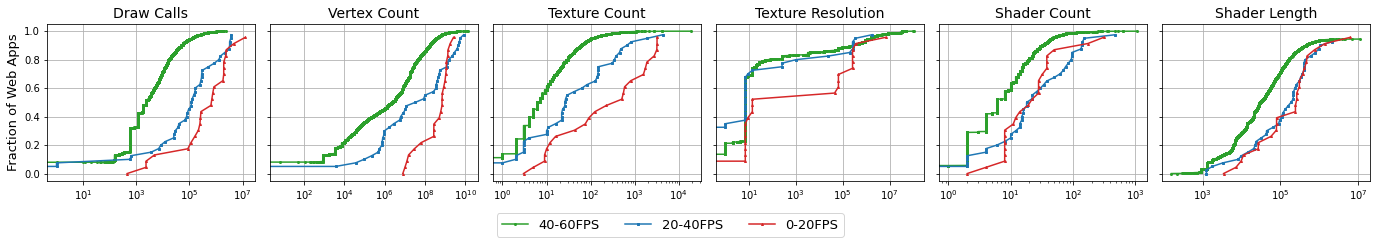

In [95]:
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(19, 3), sharey=True)
for i, col in enumerate(df_plot.columns[1:]):
    plot_cdf(df_plot.loc[(df_plot.FPS>40), col], 'o-', ax=ax[i], markersize=2, color='tab:green')
    plot_cdf(df_plot.loc[(df_plot.FPS>20) & (df_plot.FPS<=40), col], 's-', ax=ax[i], markersize=2, color='tab:blue')
    plot_cdf(df_plot.loc[(df_plot.FPS<=20), col], '^-', ax=ax[i], markersize=2, color='tab:red')
    ax[i].set_title(col, fontsize=14)
    ax[i].set_xscale('log')
    # grid on
    ax[i].grid()
    ax[i].set_axisbelow(True)
    # ax[i].set_ylabel('Fraction of Web Apps', fontsize=13)
plt.tight_layout()
ax[0].set_ylabel('Fraction of Web Apps', fontsize=13)
# ax[-1].set_xlabel('Bytes', fontsize=13)
ax[0].legend(['40-60FPS', '20-40FPS', '0-20FPS'], loc='lower center', bbox_to_anchor=(3, -0.4), ncol=3, fontsize=13)
plt.savefig('output/fig/complexity_cdf.pdf', bbox_inches='tight')

-----

# process

In [51]:
df_b['maghsk.createArguments.0'].value_counts()

maghsk.createArguments.0
webgl                 9421
webgl2                3792
experimental-webgl     335
0                      122
Name: count, dtype: int64

In [66]:
import hashlib

In [67]:
tmp = (df_b_programs['vertexShaderSouceTranslated'] + df_b_programs['fragmentShaderSouceTranslated'])
df_b_programs['hash'] = tmp.apply(lambda x: hashlib.sha256(x.encode('utf-8')).hexdigest())

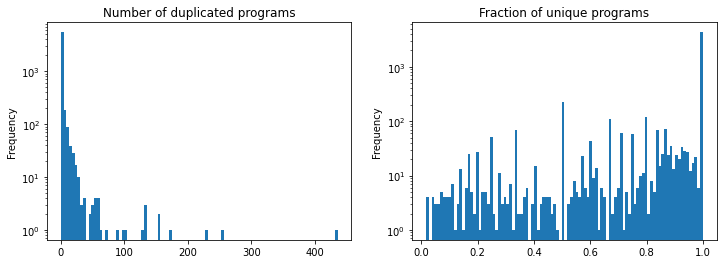

In [86]:
t = df_b_programs.groupby('index_webapp')['hash']
tt1 = t.count() - t.nunique()
tt2 = t.nunique() / t.count()
plt.figure(figsize=(12, 4))
plt.subplot(121)
tt1.plot.hist(bins=100, title='Number of duplicated programs', logy=True)
plt.subplot(122)
tt2.plot.hist(bins=100, title='Fraction of unique programs', logy=True)
plt.savefig('output/fig/2_programs.png', dpi=300, bbox_inches='tight')

In [85]:
df_b_programs['hash'].nunique(), df_b_programs['hash'].count()

(17330, 45600)

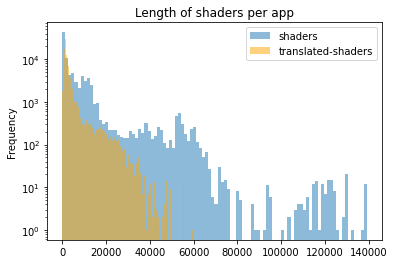

In [9]:
df_b_shaders.source.map(lambda x: len(x)).plot(kind='hist', bins=100, logy=True, title='Length of shaders per app', alpha=0.5)
df_b_shaders.translatedSource.map(lambda x: len(x)).plot(kind='hist', bins=100, logy=True, title='Length of shaders per app', color='orange', alpha=0.5)
plt.legend(['shaders', 'translated-shaders'])
plt.savefig('output/fig/2_shaders_length.png', dpi=300)

In [10]:
df_b_shaders.translatedSource.count(), df_b_shaders.translatedSource.nunique()

(90424, 23059)

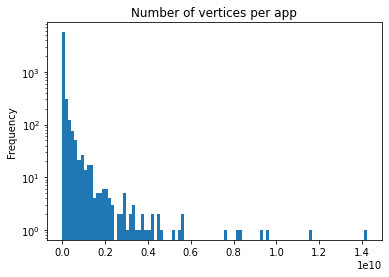

In [17]:
df_ab['maghsk.counter.vertexCount'].plot(kind='hist', bins=100, logy=True, title='Number of vertices per app')
plt.savefig('output/fig/2_vertices.png', dpi=300)

In [14]:
df_ab['maghsk.counter.primitiveCount'] = df_ab['maghsk.counter.primitiveCount.0'] + (df_ab['maghsk.counter.primitiveCount.1'] + df_ab['maghsk.counter.primitiveCount.2'] + df_ab['maghsk.counter.primitiveCount.3']) / 2 + (df_ab['maghsk.counter.primitiveCount.4'] + df_ab['maghsk.counter.primitiveCount.5'] + df_ab['maghsk.counter.primitiveCount.6']) / 3

<Axes: title={'center': 'Number of primitives per app'}, ylabel='Frequency'>

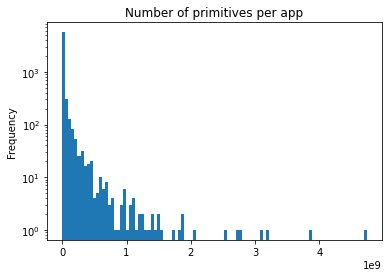

In [15]:
df_ab['maghsk.counter.primitiveCount'].plot(kind='hist', bins=100, logy=True, title='Number of primitives per app')

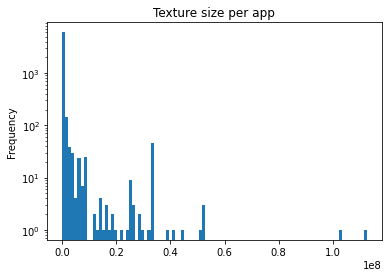

In [21]:
df_ab['textureSize'].plot(kind='hist', bins=100, logy=True, title='Texture size per app')
plt.savefig('output/fig/2_texture_size.png', dpi=300)

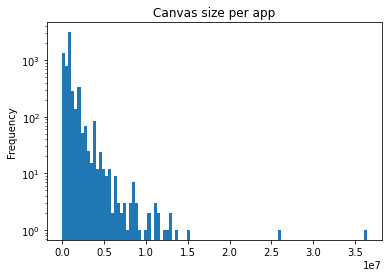

In [23]:
df_ab['canvasSize'].plot(kind='hist', bins=100, logy=True, title='Canvas size per app')
plt.savefig('output/fig/2_canvas_size.png', dpi=300)

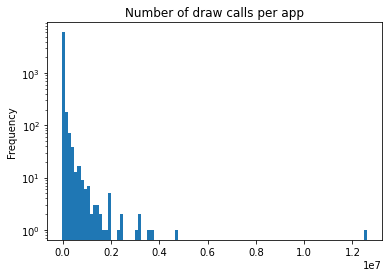

In [14]:
df_ab[['maghsk.counter.funcCount.drawArrays', 'maghsk.counter.funcCount.drawArraysInstanced', 'maghsk.counter.funcCount.drawElements', 'maghsk.counter.funcCount.drawElementsInstanced']].sum(axis=1).plot(kind='hist', bins=100, logy=True, title='Number of draw calls per app')
plt.savefig('output/fig/2_draw_calls.png', dpi=300)

In [29]:
df_b_offscreen['counter.usedOffScreenCanvas'].map(lambda x: [] if x == 0 else sorted(x)).value_counts()

counter.usedOffScreenCanvas
[]                     3939
[2d]                   2458
[webgl2]                  5
[webgl, webgl2]           2
[webgl]                   1
[2d, webgl, webgl2]       1
Name: count, dtype: int64

# performance

In [40]:
df_perf = df_perf[df_perf['frames_count'] < 700]

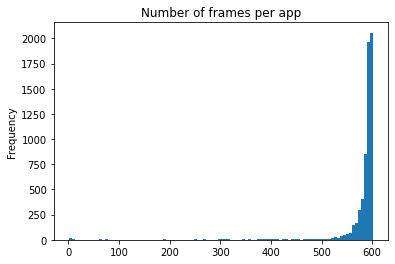

In [48]:
df_perf['frames_count'].plot(kind='hist', bins=100, logy=False, title='Number of frames per app')
plt.savefig('output/fig/2_frames.png', dpi=300)

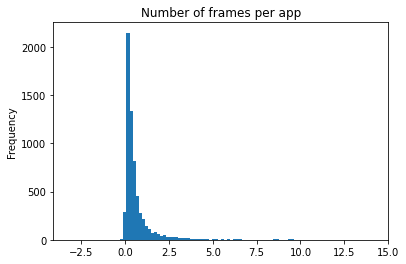

In [49]:
df_perf['cpu_full'].plot(kind='hist', bins=100, logy=False, title='Number of frames per app')
plt.savefig('output/fig/2_cpu.png', dpi=300)

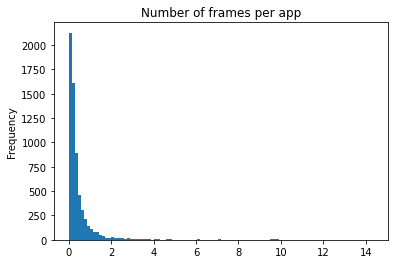

In [50]:
df_perf['gpu_full'].plot(kind='hist', bins=100, logy=False, title='Number of frames per app')
plt.savefig('output/fig/2_gpu.png', dpi=300)